**Diabetes Mellitus (DM) is one of the major metabolic syndromes, which causes a person’s body to either produce low insulin or become insensitive to insulin [1]. There are two types of diabetes, but the one that we will be focusing on in this project is DM Type 2, which is a genetic condition and is mostly related to low production of insulin [1]. Type II DM is related to insulin insensitivity acquired mostly due to obesity and sedentary lifestyle. It has been widespread in developing countries in recent years, posing a greater hazard to individuals in the latter than in the former [2].**

**According to the latest statistics on Center for Disease Control and Prevention, in 2020 about 34.2 million Americans live with diabetes [3]. This amounts to about 10.5% of the US population [3]. Out of the approximately 34.2 million plus individuals with diabetes, 26.9 million were diagnosed and 7.3 million people went undiagnosed [3]. Each year according to ADA.org, 1.5 million new cases are identified [4]. However, the most staggering statistics as per the ADA, from 2015 monitoring is that adults over the age of 18 years who have no idea they are diabetic...the numbers are 88 million people who are considered prediabetic and therefore have no reason to seek treatment because of their undiagnosed or unbeknownst condition [4]. Diabetes is the 7th leading cause of death in the United States back in 2017 based on analysis from ADA officials [4,5]. The numbers keep staggering, as the projected cost of diabetes in America is $327 billion which is attained to the cost of diagnosed diabetes in individuals from 2017 [4].**

**By 2035, the number of individuals living with diabetes is predicted to reach 592 million [6]. Despite its fatality, Type II is preventable and can be predicted based on certain characteristics. If we can predict DM type 2 at an earlier stage, the patient will not have such adverse effects nor high medical bills in there near future. That’s why our project is focused on creating a model or system that predict DM-II at an earlier stage based on the dataset.**


**The diagnostic dataset for the DM type 2 patients was collected from the UCI Machine Learning Repository with 520 entries. As shown in the table, the dataset has 16  attributes. We utilized the following python libraries: numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns and sklearn machine learning algorithm functions.**

**We will be utiliziting Logistical Regression,  Random Forest Classifier, Gaussian NB, and K-Neighbors Classifier as the algorithms for our dataset (categorical variables).**

**We will also be utilizing Classification Report and Confusion Matrix for:**

**True and false positives (TP, FP) and true and false negatives (TN, FN).**

**The percentage of errors and the accuracy of classification**

**The terms recall and sensitivity, as well as true positives, are interchangeable.**

**Precision and positive predictive value are two terms that are used interchangeably.**

**The weighted average of accuracy and recall is called F-1.**

**The dataset contains 16 attributes:**

    -Age 20-65
    
    -Sex 
        -1.Male, 2.Female
    -Polyuria 
        -1.Yes, 2.No.
    -Polydipsia 
        -1.Yes, 2.No.
    -sudden weight loss 
        -1.Yes, 2.No.
    -weakness 
        -1.Yes, 2.No.
    -Polyphagia 
        -1.Yes, 2.No.
    -Genital thrush 
        -1.Yes, 2.No.
    -visual blurring 
        -1.Yes, 2.No.
    -Itching 
        -1.Yes, 2.No.
    -Irritability 
        -1.Yes, 2.No.
    -delayed healing 
        -1.Yes, 2.No.
    -partial paresis 
        -1.Yes, 2.No.
    -muscle stiffness 
        -1.Yes, 2.No.
    -Alopecia 
        -1.Yes, 2.No.
    -Obesity 
        -1.Yes, 2.No.
    -Class 
        -1.Positive, 2.Negative.

In [56]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pandas_profiling as pp

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

**Types of Classification Algorithms Used:**

**Logistic regression**
is a classification machine learning algorithm. A logistic function is used to model the probability of the probable outcomes of a single trial in this technique. It was created for this reason (classification), and it's especially beneficial for figuring out how numerous independent variables affect a single outcome variable.

**Random Forest** a meta-estimator that fits a number of decision trees on different sub-samples of datasets and utilizes average to improve the model's predictive accuracy and control over-fitting. The size of the sub-sample is always the same as the size of the original input sample, but the samples are generated with replacement. In most circumstances, a reduction in over-fitting and a random forest classifier are more accurate than decision trees.

**Naive Bayes** is based on Bayes' theorem and assumes that every pair of features is independent. Many real-world situations, such as document classification and spam filtering, benefit from Naive Bayes classifiers. To estimate the required parameters, this technique requires a limited amount of training data. When compared to more advanced algorithms, Naive Bayes classifiers are extremely fast.

**K-Nearest Neighbours** a sort of lazy learning because it doesn't try to build a general internal model and instead just saves instances of the training data. The classification is determined by a simple majority vote of each point's k nearest neighbors. This technique is straightforward to use, robust to noisy training data.

**dataframe = pd.read_csv('diabetes_data_upload.csv')**

Read a comma-separated values (csv) file into DataFrame.

**dataframe.head()**

Return the first x rows.

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [2]:
dataframe = pd.read_csv('diabetes_data_upload.csv')
dataframe

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


**dataframe.isna().sum()**

Return a true or false object indicating if the values are NA.

NA values, such as None gets mapped to True values.

Everything else gets mapped to False values.

Then returns the sum of the values

In [3]:
dataframe.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

While analyzing this dataset, we wanted to see the unique values in certain datasets, which can be done using Pandas nunique() function.

In [4]:
for column in dataframe.columns:
    print(f"{column}: Number of unique values {dataframe[column].nunique()}")

Age: Number of unique values 51
Gender: Number of unique values 2
Polyuria: Number of unique values 2
Polydipsia: Number of unique values 2
sudden weight loss: Number of unique values 2
weakness: Number of unique values 2
Polyphagia: Number of unique values 2
Genital thrush: Number of unique values 2
visual blurring: Number of unique values 2
Itching: Number of unique values 2
Irritability: Number of unique values 2
delayed healing: Number of unique values 2
partial paresis: Number of unique values 2
muscle stiffness: Number of unique values 2
Alopecia: Number of unique values 2
Obesity: Number of unique values 2
class: Number of unique values 2


**dataframe.info()**

Print a concise summary of the CSV file, or dataframe.

This method prints information about a dataFrame including the basic object which stores the axis labels for all pandas objects and columns, non-null values and memory usage.

-- Over 520 entries from this dataset

Age is int64 because it's integer dtype

Everything else is object Dtype because they are considered categorical variables, and we need to change them the binary form.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
dataframe.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


**sns.countplot(x= dataframe['class'], data=dataframe)**

Using bars, display the number of observations in each category, in this case, it's count.

A count plot is a histogram across a category variable rather than a quantitative variable.

<AxesSubplot:xlabel='count', ylabel='class'>

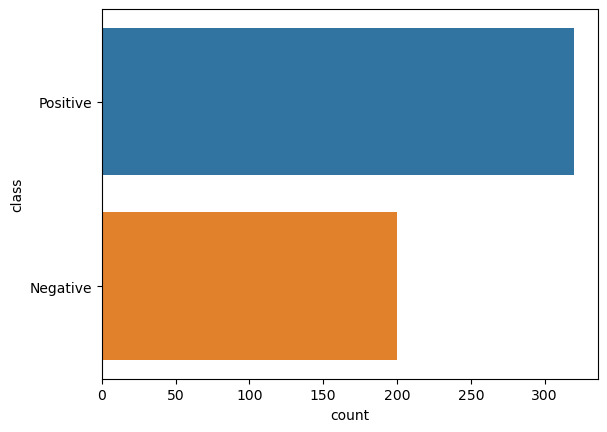

In [7]:
sns.countplot(y= dataframe['class'], data=dataframe)

<function matplotlib.pyplot.show(close=None, block=None)>

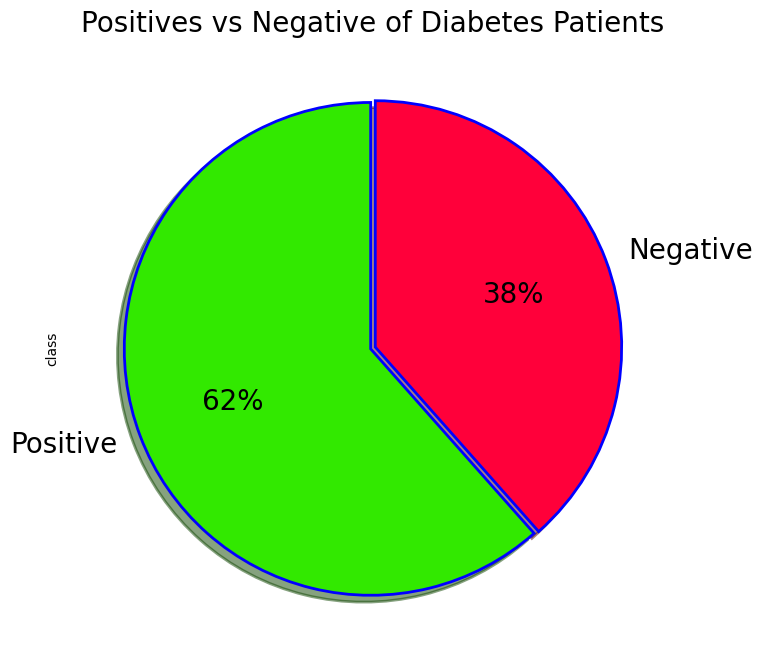

In [8]:
plt.figure(figsize=(14, 8))

dataframe["class"].value_counts().plot.pie(autopct = "%1.0f%%",
                                           fontsize = 20,
                                           colors = sns.color_palette('prism',2),
                                           startangle = 90,
                                           labels=["Positive",
                                                   "Negative"],
                                           wedgeprops={"linewidth":2,
                                                       "edgecolor":"blue"},
                                           explode=[.01
                                                    ,.01],
                                           shadow =True)


plt.title("Positives vs Negative of Diabetes Patients",
          fontsize = 20
          )
plt.show

**Gender and Class Distribution**


<AxesSubplot:xlabel='count', ylabel='Gender'>

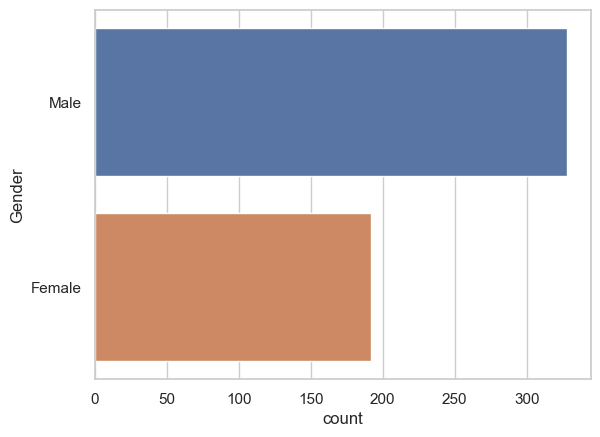

In [9]:
sns.set_theme(style="whitegrid")
sns.countplot(y = dataframe['Gender'], 
              data=dataframe)

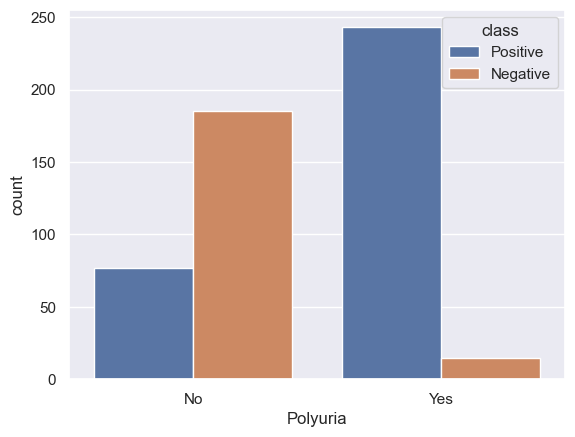

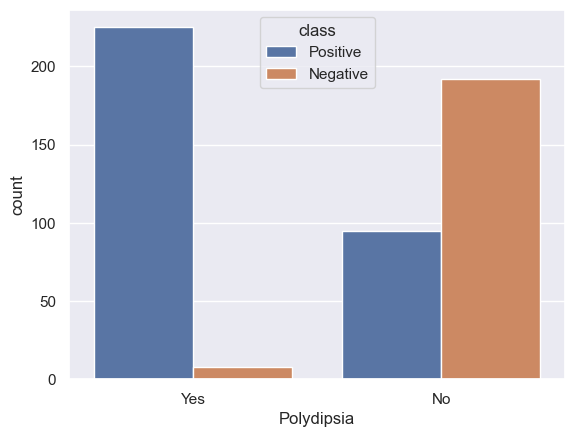

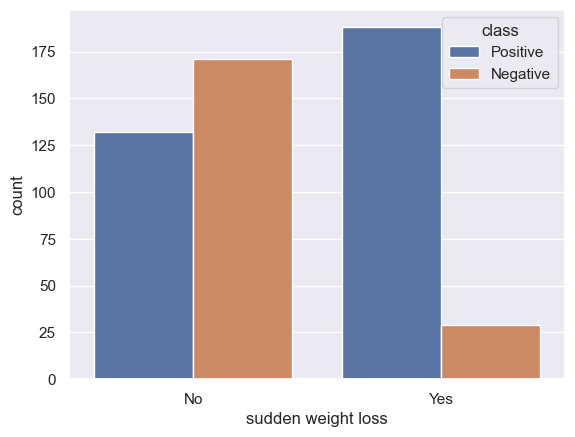

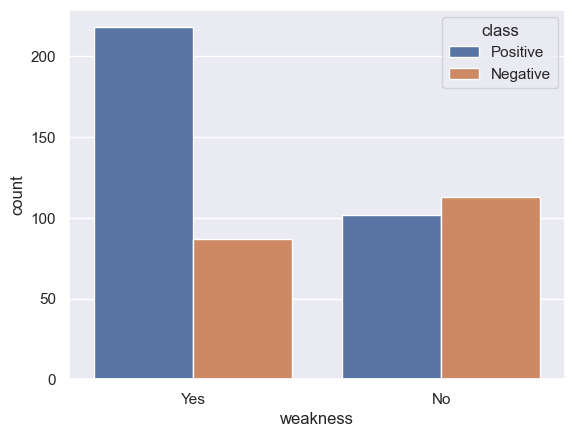

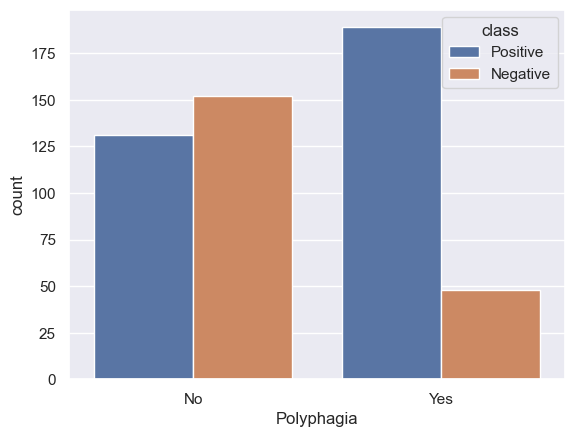

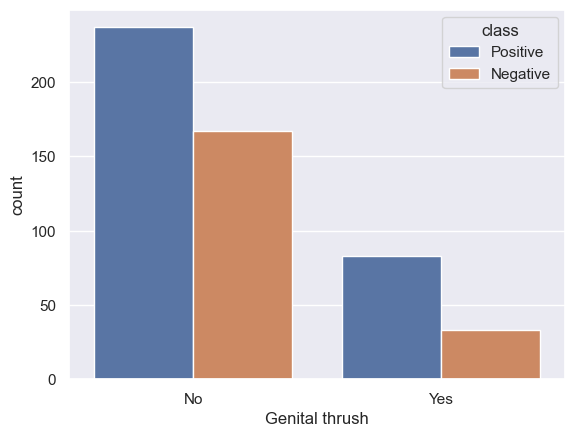

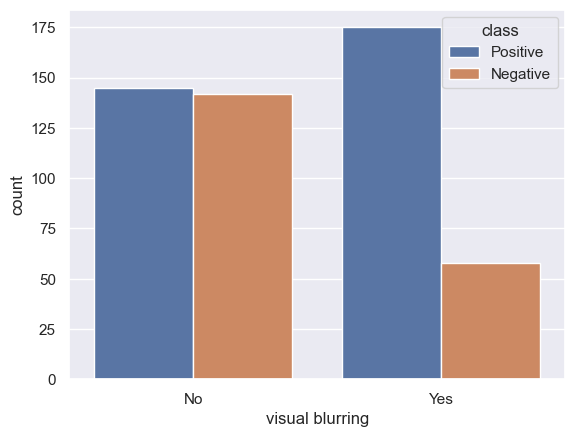

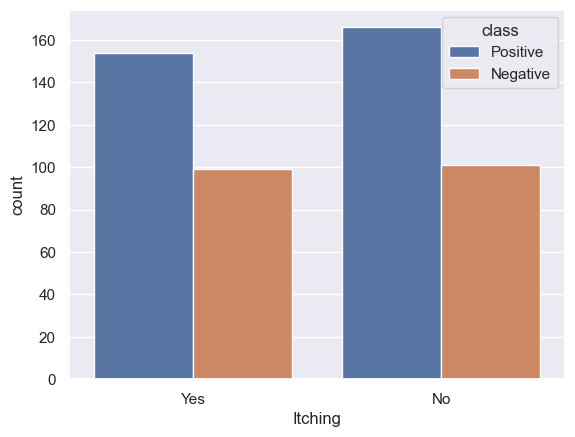

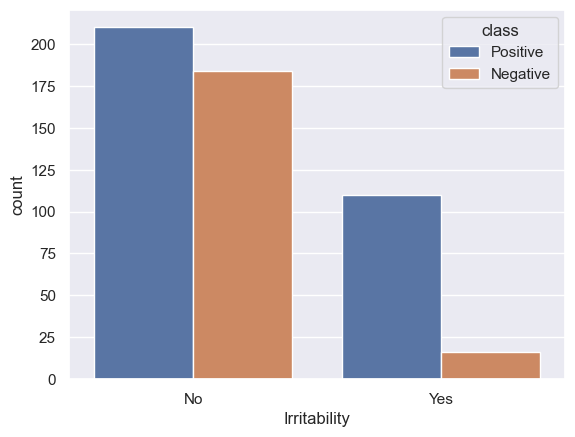

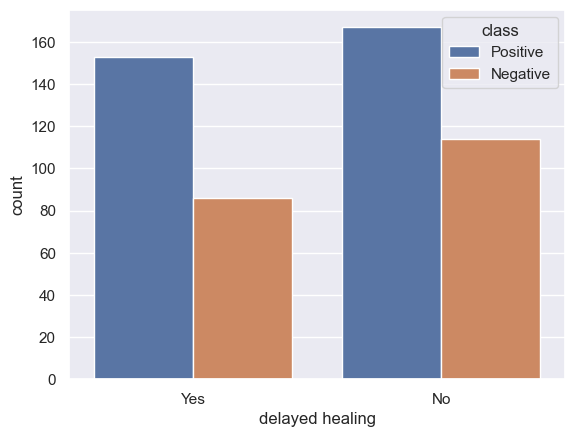

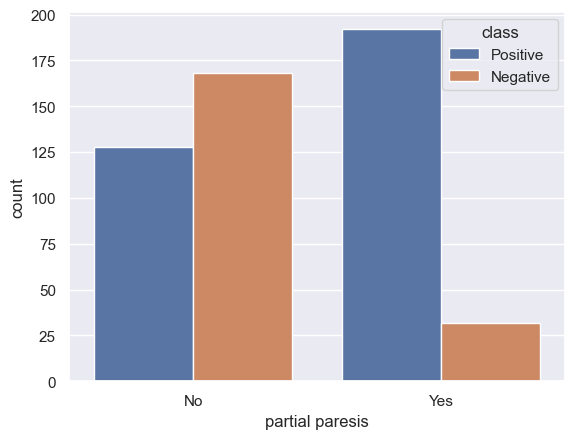

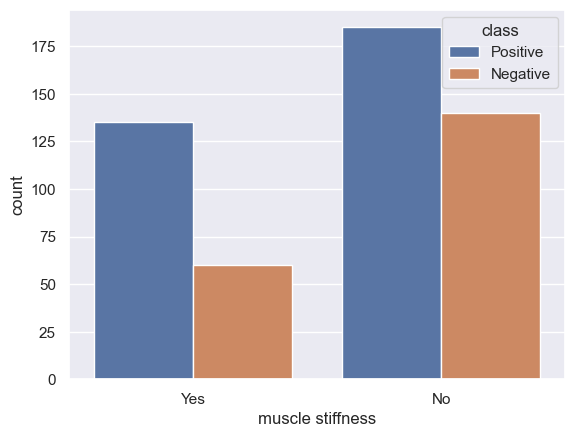

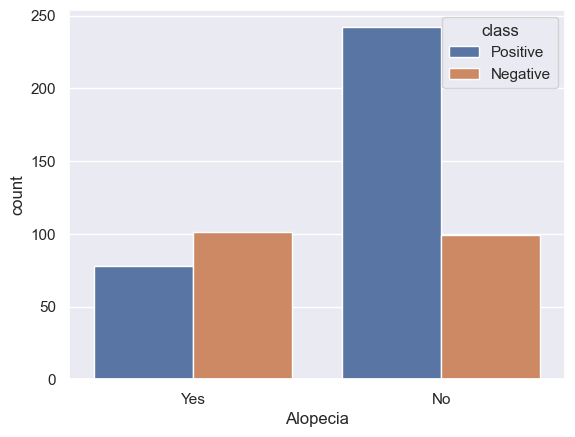

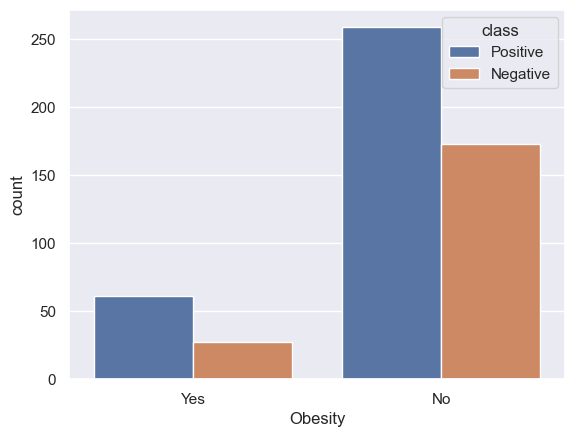

In [10]:
total_s_s= len(dataframe)
columns = ['Polyuria','Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
           'Genital thrush', 'visual blurring', 'Itching', 'Irritability','delayed healing', 
           'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

sns.set_theme(style="darkgrid")

for s_s in columns:

    plots = sns.countplot(data=dataframe, x = s_s, hue = dataframe["class"])
    plt.show()

**Pie Chart Correlation between Positives and Negatives of Signs and Symptoms**

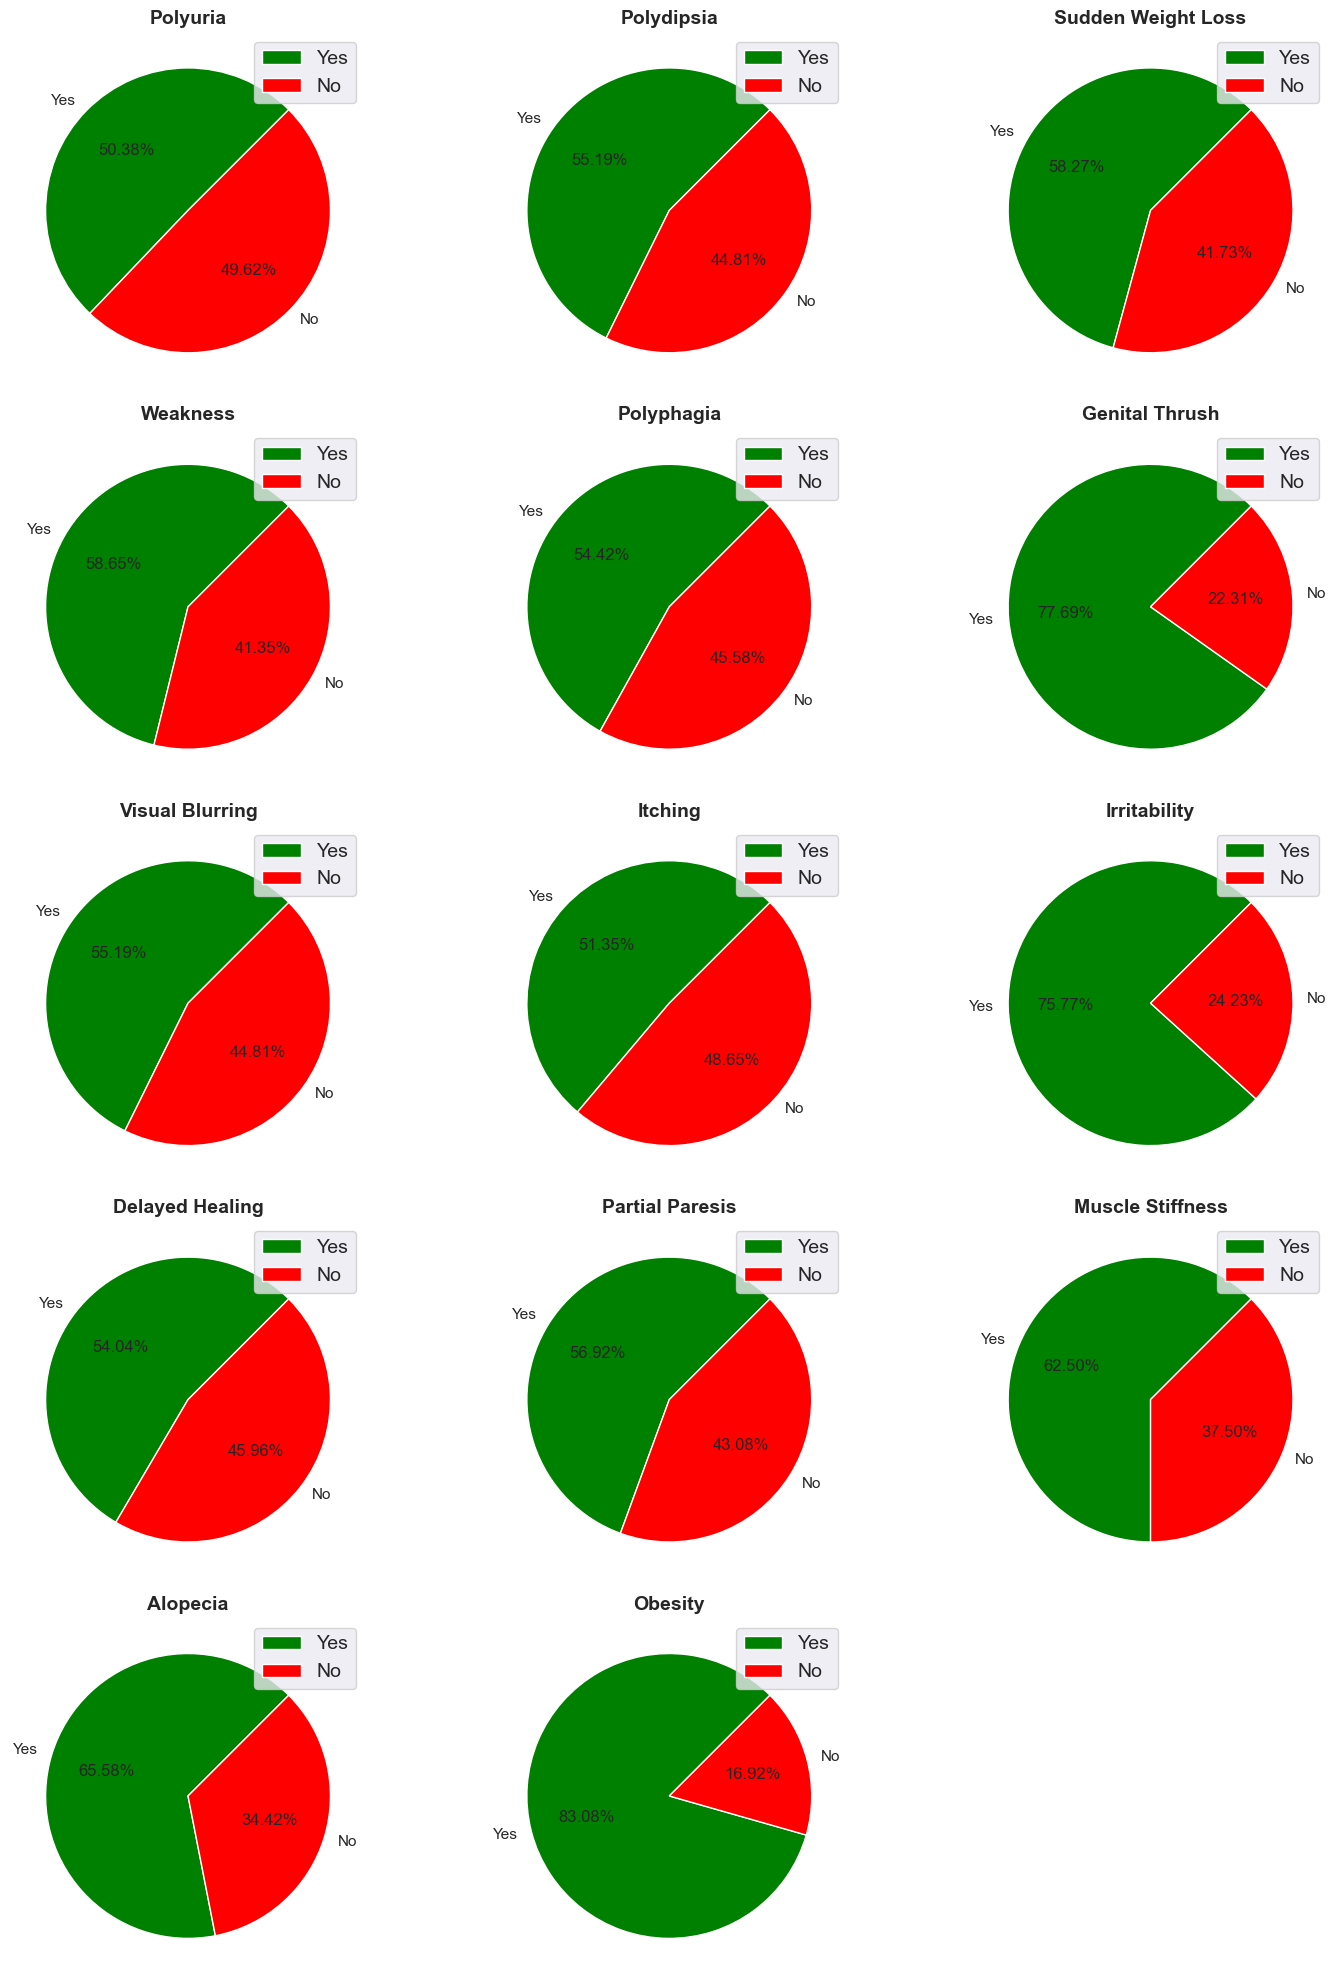

In [11]:
index=1

plt.figure(figsize=(15,20))

for signs_symptoms in dataframe.columns:
    if signs_symptoms not in ['class','Age','Gender']:
        plt.subplot(5,3,index)
        plt.title(f'{signs_symptoms.title()}',fontweight='bold',fontsize=14)
        index += 1
        dataframe[signs_symptoms].value_counts().plot(kind="pie",
                                                      colors=['green','red'],
                                                      legend=True,
                                                      labels=["Yes","No"],
                                                      startangle=45,
                                                      autopct='%0.2f%%')
        plt.ylabel('')
        plt.legend(loc = "upper right",fontsize=14)
plt.tight_layout()
plt.show()

In [53]:
# forming dataframe and printing
dataframe = pd.DataFrame(dataframe)
print(dataframe)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

In [58]:
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(dataframe)
profile.to_file("PandasProfile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
def processing_data(dataframe):
    dataframe= dataframe.copy()
    
    # Gender column Binary Encoding
    #https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
    dataframe['Gender'] = dataframe ['Gender'].replace({'Female':0,
                                                        'Male':1 })
    
    #Symptom Column Binary Encoding
    #https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
    for column in dataframe.columns.drop(['Age',
                                          'Gender',
                                          'class']):
     dataframe[column]= dataframe[column].replace({'No':0 , 
                                                   'Yes': 1})
    
    #train
    y=dataframe["class"]
    X=dataframe.drop("class", axis=1)
    
    #test_train_split
    X_train, X_test,y_train,y_test = train_test_split(X,y,
                                                      train_size=0.4,
                                                      shuffle=True,
                                                      random_state=1)
    
    #StandardScaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=pd.DataFrame(scaler.transform(X_train),
                         index=X_train.index, 
                         columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test),
                        index=X_test.index,
                        columns=X_test.columns)
    
    return X_train,X_test,y_train,y_test

In [13]:
X_train,X_test,y_train,y_test= processing_data(dataframe)

In [14]:
X_train.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
count,2.080000e+02,2.080000e+02,2.080000e+02,208.000000,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,9.500947e-17,-2.316523e-16,1.643984e-16,0.000000,-2.615429e-16,1.889514e-16,1.131573e-16,3.522823e-17,5.978124e-17,-1.078197e-16,-7.899664e-17,-5.657867e-17,-5.978124e-17,1.558582e-16,9.927956e-17,1.323727e-16
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-2.024443e+00,-1.264911e+00,-9.904304e-01,-0.881917,-8.479436e-01,-1.101257e+00,-8.395940e-01,-5.699480e-01,-8.312983e-01,-9.258201e-01,-6.292640e-01,-8.733338e-01,-9.080536e-01,-7.353508e-01,-6.817542e-01,-4.497912e-01
25%,-7.503610e-01,-1.264911e+00,-9.904304e-01,-0.881917,-8.479436e-01,-1.101257e+00,-8.395940e-01,-5.699480e-01,-8.312983e-01,-9.258201e-01,-6.292640e-01,-8.733338e-01,-9.080536e-01,-7.353508e-01,-6.817542e-01,-4.497912e-01
50%,-2.231394e-02,7.905694e-01,-9.904304e-01,-0.881917,-8.479436e-01,9.080536e-01,-8.395940e-01,-5.699480e-01,-8.312983e-01,-9.258201e-01,-6.292640e-01,-8.733338e-01,-9.080536e-01,-7.353508e-01,-6.817542e-01,-4.497912e-01
75%,7.057331e-01,7.905694e-01,1.009662e+00,1.133893,1.179324e+00,9.080536e-01,1.191052e+00,-5.699480e-01,1.202938e+00,1.080123e+00,1.589158e+00,1.145038e+00,1.101257e+00,1.359895e+00,1.466804e+00,-4.497912e-01
max,2.252833e+00,7.905694e-01,1.009662e+00,1.133893,1.179324e+00,9.080536e-01,1.191052e+00,1.754546e+00,1.202938e+00,1.080123e+00,1.589158e+00,1.145038e+00,1.101257e+00,1.359895e+00,1.466804e+00,2.223254e+00


**X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.**

**X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.**

In [15]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
33,0.614727,0.790569,1.009662,1.133893,1.179324,0.908054,-0.839594,-0.569948,1.202938,1.080123,1.589158,1.145038,1.101257,1.359895,-0.681754,-0.449791
35,0.068692,0.790569,1.009662,1.133893,-0.847944,0.908054,-0.839594,1.754546,1.202938,1.080123,-0.629264,-0.873334,-0.908054,-0.735351,-0.681754,-0.449791
63,1.160762,-1.264911,1.009662,-0.881917,1.179324,0.908054,-0.839594,1.754546,1.202938,1.080123,-0.629264,1.145038,1.101257,1.359895,-0.681754,2.223254
429,0.978751,0.790569,1.009662,1.133893,1.179324,0.908054,1.191052,-0.569948,1.202938,-0.925820,-0.629264,1.145038,1.101257,1.359895,-0.681754,2.223254
486,-0.750361,-1.264911,1.009662,1.133893,1.179324,0.908054,1.191052,-0.569948,-0.831298,1.080123,1.589158,1.145038,1.101257,-0.735351,-0.681754,-0.449791
234,0.432715,0.790569,-0.990430,-0.881917,-0.847944,0.908054,1.191052,-0.569948,-0.831298,1.080123,-0.629264,1.145038,-0.908054,-0.735351,1.466804,-0.449791
516,0.068692,-1.264911,1.009662,1.133893,1.179324,0.908054,1.191052,-0.569948,-0.831298,1.080123,1.589158,1.145038,1.101257,-0.735351,-0.681754,-0.449791
45,0.068692,-1.264911,-0.990430,-0.881917,1.179324,0.908054,-0.839594,-0.569948,1.202938,1.080123,-0.629264,1.145038,1.101257,-0.735351,-0.681754,-0.449791
303,0.978751,-1.264911,1.009662,-0.881917,1.179324,-1.101257,1.191052,-0.569948,-0.831298,-0.925820,1.589158,-0.873334,-0.908054,1.359895,-0.681754,2.223254
177,0.250704,-1.264911,1.009662,1.133893,1.179324,-1.101257,1.191052,-0.569948,-0.831298,-0.925820,-0.629264,1.145038,1.101257,-0.735351,-0.681754,-0.449791


In [16]:
X_test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
273,-0.204326,0.790569,-0.990430,-0.881917,-0.847944,-1.101257,1.191052,1.754546,-0.831298,-0.925820,-0.629264,-0.873334,-0.908054,-0.735351,-0.681754,-0.449791
272,-0.022314,0.790569,-0.990430,-0.881917,-0.847944,-1.101257,-0.839594,-0.569948,-0.831298,1.080123,-0.629264,-0.873334,-0.908054,-0.735351,1.466804,-0.449791
329,0.796739,0.790569,-0.990430,-0.881917,1.179324,0.908054,1.191052,-0.569948,1.202938,1.080123,-0.629264,1.145038,-0.908054,1.359895,1.466804,-0.449791
480,-0.113320,0.790569,-0.990430,-0.881917,-0.847944,0.908054,-0.839594,-0.569948,-0.831298,1.080123,-0.629264,1.145038,-0.908054,-0.735351,1.466804,-0.449791
173,1.433780,0.790569,1.009662,1.133893,1.179324,0.908054,1.191052,-0.569948,1.202938,-0.925820,-0.629264,-0.873334,-0.908054,1.359895,1.466804,2.223254
62,0.705733,-1.264911,1.009662,1.133893,-0.847944,0.908054,1.191052,-0.569948,1.202938,1.080123,-0.629264,1.145038,1.101257,1.359895,-0.681754,-0.449791
232,0.796739,0.790569,-0.990430,1.133893,-0.847944,0.908054,1.191052,-0.569948,1.202938,1.080123,-0.629264,1.145038,-0.908054,1.359895,1.466804,-0.449791
147,-0.841367,0.790569,1.009662,-0.881917,-0.847944,-1.101257,-0.839594,1.754546,-0.831298,1.080123,-0.629264,-0.873334,-0.908054,1.359895,-0.681754,2.223254
370,-0.204326,0.790569,-0.990430,-0.881917,-0.847944,-1.101257,1.191052,1.754546,-0.831298,-0.925820,-0.629264,-0.873334,-0.908054,-0.735351,-0.681754,-0.449791
267,-1.114384,-1.264911,-0.990430,-0.881917,-0.847944,-1.101257,-0.839594,-0.569948,-0.831298,-0.925820,-0.629264,-0.873334,-0.908054,-0.735351,-0.681754,-0.449791


**y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.**

**y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.**

In [17]:
y_train

33     Positive
35     Positive
63     Positive
429    Positive
486    Positive
         ...   
129    Positive
144    Positive
72     Positive
235    Negative
37     Positive
Name: class, Length: 208, dtype: object

In [18]:
y_test

273    Negative
272    Negative
329    Negative
480    Negative
173    Positive
         ...   
408    Negative
430    Positive
48     Positive
433    Positive
412    Negative
Name: class, Length: 312, dtype: object

In [19]:
models= {
    'LogisticRegrsssion': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier()
        
   
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+ ': trained')

LogisticRegrsssion: trained
RandomForestClassifier: trained
GaussianNB: trained
KNeighborsClassifier: trained


In [20]:
for name,model in models.items():
    print(name+ ": {:.2f}%".format(model.score(X_test,y_test) * 100))

LogisticRegrsssion: 91.35%
RandomForestClassifier: 96.79%
GaussianNB: 87.18%
KNeighborsClassifier: 90.71%


**From the algorithms for classification, as you can see the RandomForrest Classifier was the most prevalent.**

**The Logistical Regression and KNeighbors Classifier was almost the same in prevalance with 1% off.**

**The GaussianNB was least prevalent. But we can still find which is most prevalent with the classification report using:**

**precision, recall, f1-score, and support**

https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=Understanding%20the%20Classification%20report%20through%20sklearn%20A%20Classification,predictions%20are%20True%20and%20how%20many%20are%20False.

**Classification Report and Confusion Matrix for Logistical Regression**

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_prediction_y = log_reg.predict(X_test)

print(classification_report(y_test, log_reg_prediction_y))

              precision    recall  f1-score   support

    Negative       0.86      0.93      0.89       120
    Positive       0.95      0.91      0.93       192

    accuracy                           0.91       312
   macro avg       0.91      0.92      0.91       312
weighted avg       0.92      0.91      0.91       312



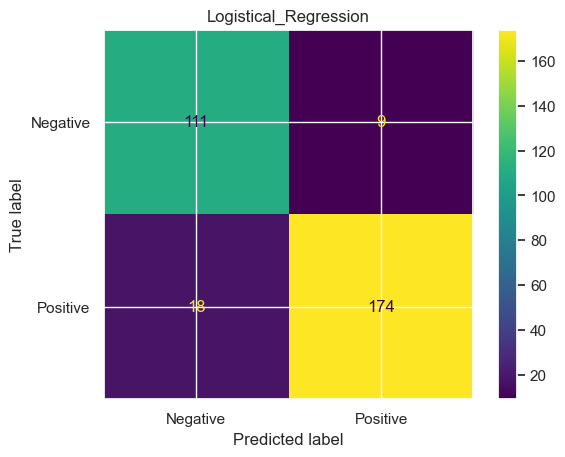

In [22]:
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show
plt.title('Logistical_Regression')
plt.savefig("Logistical_Regression.png")

**Classification Report and Confusion Matrix for KNN**

In [23]:
knn_rp = KNeighborsClassifier()
knn_rp.fit(X_train, y_train)
knn_prediction_y = knn_rp.predict(X_test)

print(classification_report(y_test, knn_prediction_y))

              precision    recall  f1-score   support

    Negative       0.82      0.97      0.89       120
    Positive       0.98      0.86      0.92       192

    accuracy                           0.91       312
   macro avg       0.90      0.92      0.90       312
weighted avg       0.92      0.91      0.91       312



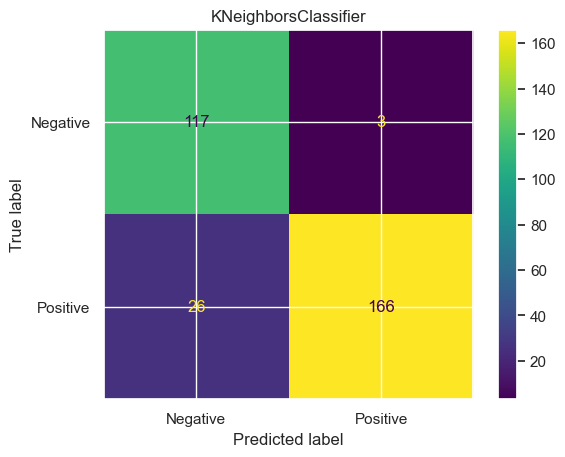

In [24]:
plot_confusion_matrix(knn_rp, X_test, y_test)
plt.show
plt.title('KNeighborsClassifier')
plt.savefig("KNeighborsClassifier.png")

**Classification Report and Confusion Matrix for GaussianNB**

In [25]:
Gaussian_rp = GaussianNB()
Gaussian_rp.fit(X_train, y_train)
gnb_prediction_y = Gaussian_rp.predict(X_test)

print(classification_report(y_test, gnb_prediction_y))

              precision    recall  f1-score   support

    Negative       0.86      0.79      0.83       120
    Positive       0.88      0.92      0.90       192

    accuracy                           0.87       312
   macro avg       0.87      0.86      0.86       312
weighted avg       0.87      0.87      0.87       312



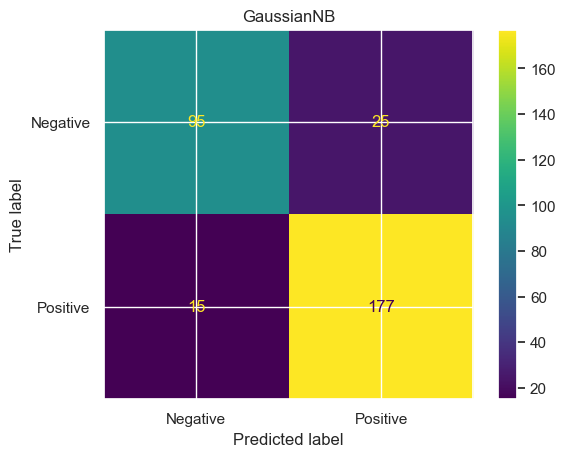

In [26]:
plot_confusion_matrix(Gaussian_rp, X_test, y_test)
plt.show
plt.title('GaussianNB')
plt.savefig("GaussianNB.png")

**Classification Report and Confusion Matrix for RandomForestClassifier**

In [27]:
RF_rp = RandomForestClassifier()
RF_rp.fit(X_train, y_train)
rf_prediction_y = RF_rp.predict(X_test)

print(classification_report(y_test, rf_prediction_y))

              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96       120
    Positive       0.99      0.96      0.98       192

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



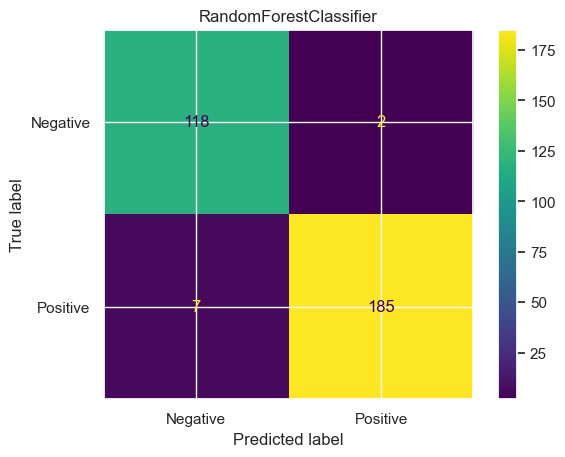

In [28]:
plot_confusion_matrix(RF_rp, X_test, y_test)
plt.show
plt.title('RandomForestClassifier')
plt.savefig("RandomForestClassifier.png")

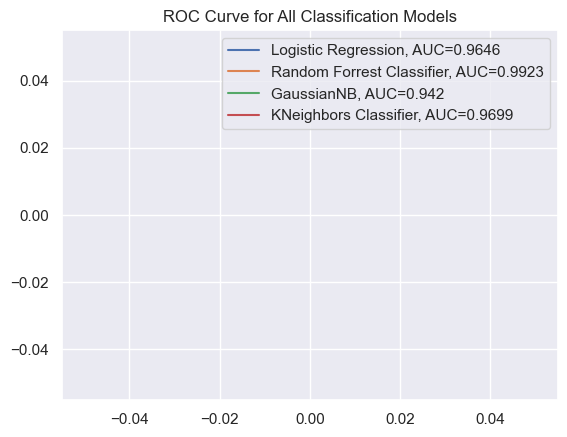

In [51]:
#set up plotting area
plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit RandomForestClassifier and plot ROC curve
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forrest Classifier, AUC="+str(auc))

#fit GaussianNB and plot ROC curve
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="GaussianNB, AUC="+str(auc))

#fit KNeighborsClassifier and plot ROC curve
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighbors Classifier, AUC="+str(auc))

#add legend
plt.legend()
plt.title('ROC Curve for All Classification Models')
plt.savefig("ROC Curve.png")

[1] Mahboob Alam T, Iqbal MA, Ali Y, et al. A model for early prediction of diabetes. Inform Med Unlocked 2019;16:100204. doi:10.1016/j.imu.2019.100204


[2] Tigga NP, Garg S. Prediction of Type 2 Diabetes using Machine Learning Classification Methods. Procedia Comput Sci 2020;167:706–16. doi:10.1016/j.procs.2020.03.336


[3] National Diabetes Statistics Report, 2020 | CDC. 2020.https://www.cdc.gov/diabetes/data/statistics-report/index.html (accessed 10 Dec 2021).


[4] Statistics About Diabetes | ADA. https://www.diabetes.org/resources/statistics/statistics-about-diabetes (accessed 10 Dec 2021).


[5] Iervasi K. The top 10 leading causes of death in the US in 2021 [List]. finder.com. 2018.https://www.finder.com/what-are-the-top-20-causes-of-death-in-united-states (accessed 11 Dec 2021).


[6] Nanditha A, Ma RCW, Ramachandran A, et al. Diabetes in Asia and the Pacific: Implications for the Global Epidemic. Diabetes Care 2016;39:472–85. doi:10.2337/dc15-1536

[7] Navlani A. Python Logistic Regression with Sklearn & Scikit. DataCamp Community. 2019.https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python (accessed 12 Dec 2021).

[8] Sruthi ER. Random Forest | Introduction to Random Forest Algorithm. Anal. Vidhya. 2021.https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/ (accessed 12 Dec 2021).

[9] Navlani A. Sklearn Naive Bayes Classifier Python: Gaussian Naive Bayes Scikit-Learn Tutorial. DataCamp Community. 2018.https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn (accessed 15 Dec 2021).

[10] Yıldırım S. K-Nearest Neighbors (kNN) — Explained. Medium. 2020.https://towardsdatascience.com/k-nearest-neighbors-knn-explained-cbc31849a7e3 (accessed 11 Dec 2021).



